In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

In [311]:
# Import Data
covid_cases = pd.read_csv('covid_cases_cleaned.csv')

In [312]:
# Drop Unnamed Column
covid_cases.drop('Unnamed: 0', axis = 1, inplace=True)

In [313]:
# Drop NaNs in hosp_yn column
covid_cases.dropna(subset=['hosp_yn'], inplace = True)

In [314]:
# Drop all unneeded columns
covid_cases_df = covid_cases.drop(columns=['case_month','case_positive_specimen_interval','state_fips_code','county_fips_code','case_onset_interval','process',\
                                                     'exposure_yn','res_county','symptom_status','icu_yn','death_yn','underlying_conditions_yn','case_month'])

In [315]:
# Instantiate One Hot Encoder
ohe = OneHotEncoder(cols = ['res_state','sex','race','age_group','ethnicity','current_status','hosp_yn'], use_cat_names=True)

In [316]:
# Fit OHE
filterwarnings('ignore')
encoded_df = ohe.fit_transform(covid_cases_df)

In [317]:
# Create correlation matrix, unstack and convert to data frame
encoded_df = encoded_df.corr().unstack().to_frame().reset_index()

In [318]:
# Rename columns
encoded_df.rename(columns = {'level_0':'feature_1', 'level_1': 'feature_2',0:'corr'},inplace=True)

In [319]:
# Filter feature_1 column for any cell containing 'hosp'
encoded_corr_df = encoded_df[(encoded_df['feature_1'].str[:4] == 'hosp')&(encoded_df['corr']<1)].sort_values('corr',ascending=False)

In [361]:
# Filter feature_1 column of 'hops_yn_YES' and sort ascending
top_feat_corr_hosp = encoded_corr_df[((encoded_corr_df['feature_1'] == 'hosp_yn_Yes') | (encoded_corr_df['feature_1'] == 'hosp_yn_No'))&\
                                (encoded_corr_df['corr']<1) & (encoded_corr_df['corr']>-1)].sort_values('corr',ascending=False)

In [321]:
# Rename dataframe
top_feat_corr_hosp_no = top_feat_corr_hosp[top_feat_corr_hosp['feature_1']=='hosp_yn_Yes'].sort_values(by='corr', ascending=True)[:10]

In [322]:
# Convert negatives to positive for ease of converting to bar chart
top_feat_corr_hosp_no['corr'] = top_feat_corr_hosp_no['corr'].apply(lambda x: x*-1)

In [323]:
# resassign variables in feature_1 column
top_feat_corr_hosp_no['feature_1'] = top_feat_corr_hosp_no['feature_1'].apply(lambda x: x.replace('Yes','No'))

In [324]:
# Rename corr column
top_feat_corr_hosp_no.rename({'corr':'Correlation'}, axis = 1, inplace = True)

In [326]:
# Rename dataframe and and drop feature_1 column
top_10_features_least_correlated_with_hospializations = top_feat_corr_hosp_no.drop('feature_1', axis = 1)

In [327]:
# Rename feature 2 column
top_10_features_least_correlated_with_hospializations.rename({'feature_2':'Feature'}, axis = 1, inplace = True)

In [328]:
# reassign variable in Feature column
top_10_features_least_correlated_with_hospializations.replace(to_replace='current_status_Probable Case',value='Probable Case', inplace=True)

In [329]:
# remove '_res' prefix from variables
top_10_features_least_correlated_with_hospializations.replace(to_replace='res_', value='',regex=True, inplace = True)

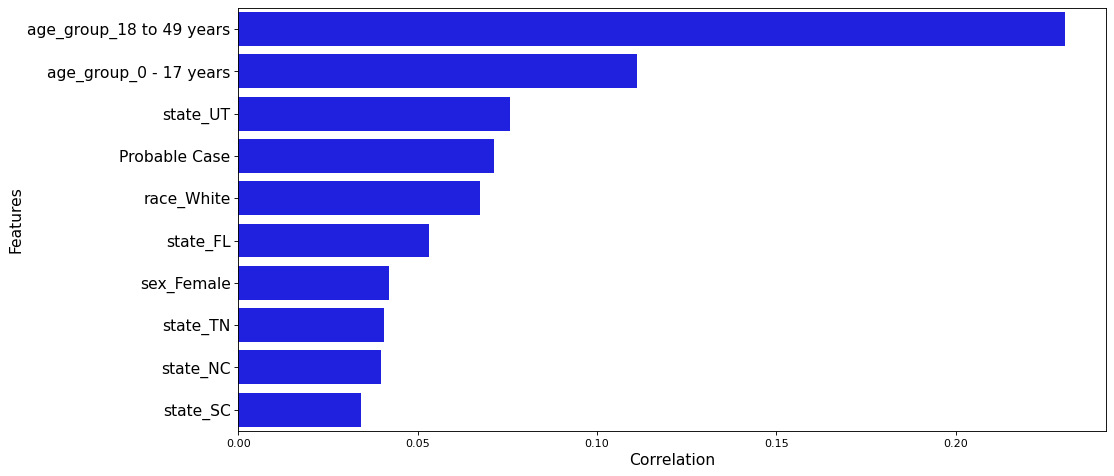

In [330]:
# Create bar chart showing Features Least associated with Hospitalizations
pd.set_option('display.max_colwidth', None)
plt.figure(figsize = (14,7), dpi = 80)
sns.barplot(data = top_10_features_least_correlated_with_hospializations, y = 'Feature', x = 'Correlation', color = 'blue')
plt.xlabel('Correlation',fontsize = 14)
plt.ylabel('Features',fontsize = 14)
plt.yticks(fontsize= 14);

In [331]:
# Create data frame for top features associated with hospitalizations
top_feat_corr_hosp_yes = top_feat_corr_hosp[top_feat_corr_hosp['feature_1']=='hosp_yn_Yes'].sort_values(by='corr', ascending=False)[:10]

In [332]:
# rename 'corr' column
top_feat_corr_hosp_yes.rename({'corr':'Correlation'}, axis = 1, inplace = True)

In [333]:
# Drop first column
top_10_features_highly_correlated_with_hospializations = top_feat_corr_hosp_yes.drop('feature_1', axis = 1)

In [334]:
# rename feature_2 column
top_10_features_highly_correlated_with_hospializations.rename({'feature_2':'Feature'}, axis = 1, inplace = True)

In [335]:
# reassign variable in Feature column
top_10_features_highly_correlated_with_hospializations.replace(to_replace='current_status_Laboratory-confirmed case',value='Confirmed Case', inplace=True)

In [336]:
# remove prefix '_res'
top_10_features_highly_correlated_with_hospializations.replace(to_replace='res_', value='',regex=True, inplace = True)

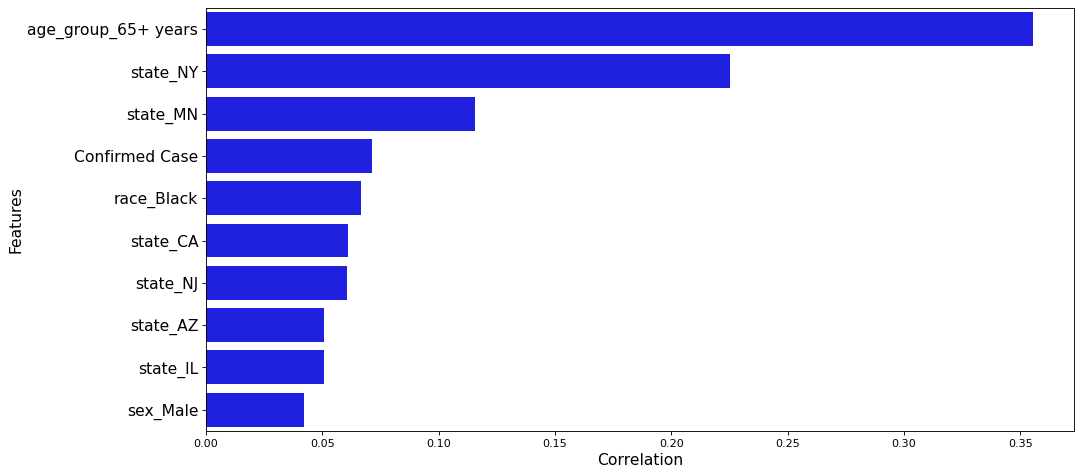

In [337]:
# Create bar chart showing top Features Associated with hospitalizations
pd.set_option('display.max_colwidth', None)
plt.figure(figsize = (14,7), dpi = 80)
sns.barplot(data = top_10_features_highly_correlated_with_hospializations, y = 'Feature', x = 'Correlation', color = 'blue')
plt.xlabel('Correlation',fontsize = 14)
plt.ylabel('Features',fontsize = 14)
plt.yticks(fontsize= 14);

In [338]:
# Create dataframe to show feature combinations associated with covid hospitalizations
hosp_yes = covid_cases_df[covid_cases_df['hosp_yn']=='Yes']

In [339]:
# Instantiate One Hot Encoder
ohe = OneHotEncoder(cols = ['res_state','sex','race','age_group','ethnicity','current_status'], use_cat_names=True)

In [340]:
# fit OHE
filterwarnings('ignore')
hosp_yes_df = ohe.fit_transform(hosp_yes)

In [341]:
# Create correlation matrix, unstack and convert to dataframe
hosp_yes_corr_df = hosp_yes_df.corr().unstack().to_frame().reset_index()

In [342]:
# Rename columns
hosp_yes_corr_df.rename(columns = {'level_0':'feature_1', 'level_1': 'feature_2',0:'corr'},inplace=True)

In [343]:
# Filter on correlation less than 1 and greater than -1
top_feat_corr_hosp_yes = hosp_yes_corr_df[(hosp_yes_corr_df['corr']<1) & (hosp_yes_corr_df['corr']>=0)].sort_values('corr',ascending=False)

In [344]:
# Drop duplicates
top_10_feat_corr_hosp_yes = top_feat_corr_hosp_yes.drop_duplicates(subset=['corr']).head(10)

In [345]:
# remove prefix 'res_'
top_10_feat_corr_hosp_yes.replace(to_replace='res_', value='', regex=True, inplace=True)

In [346]:
# Create feature combination column
top_10_feat_corr_hosp_yes['Feature Combinations'] = '('+top_10_feat_corr_hosp_yes['feature_1']+')' +' '+'&'+' '+'('+top_10_feat_corr_hosp_yes['feature_2']+')'

In [347]:
# Rename corr column
top_10_feat_corr_hosp_yes = top_10_feat_corr_hosp_yes[['Feature Combinations','corr']].rename({'corr':'Correlation'}, axis = 1).reset_index(drop=True)

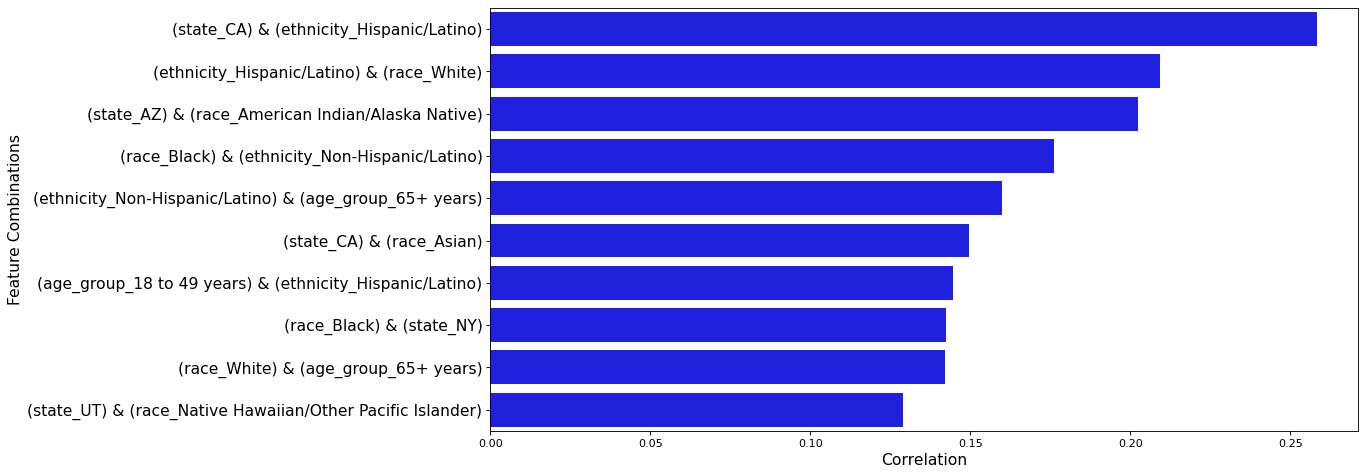

In [348]:
# Create bar chart showing top feature combinations associated with hospitalizations
pd.set_option('display.max_colwidth', None)
plt.figure(figsize = (14,7), dpi = 80)
sns.barplot(data = top_10_feat_corr_hosp_yes, y = 'Feature Combinations', x = 'Correlation', color = 'blue')
plt.xlabel('Correlation',fontsize = 14)
plt.ylabel('Feature Combinations',fontsize = 14)
plt.yticks(fontsize= 14);

In [381]:
# Create data frame for hospitalizations by symptom status
hospitalizations_by_symptom_status = covid_cases[['sex','symptom_status','hospitalizations']]

In [382]:
# Fill NaN values
filterwarnings('ignore')
hospitalizations_by_symptom_status['symptom_status'] = hospitalizations_by_symptom_status['symptom_status'].fillna('Undetermined')

In [383]:
# Drop rows with NaNs
filterwarnings('ignore')
hospitalizations_by_symptom_status.dropna(inplace=True)

In [384]:
# Sum values by symptom status and gender
hospitalizations_by_symptom_status = hospitalizations_by_symptom_status.groupby(['symptom_status','sex']).sum()

In [385]:
# Sort values
hospitalizations_by_symptom_status.sort_values(by = 'hospitalizations', ascending=True, inplace = True)

In [386]:
# reset index
hosp_by_sym_stat = hospitalizations_by_symptom_status.reset_index()

Text(0, 0.5, 'Hospitalizations\n')

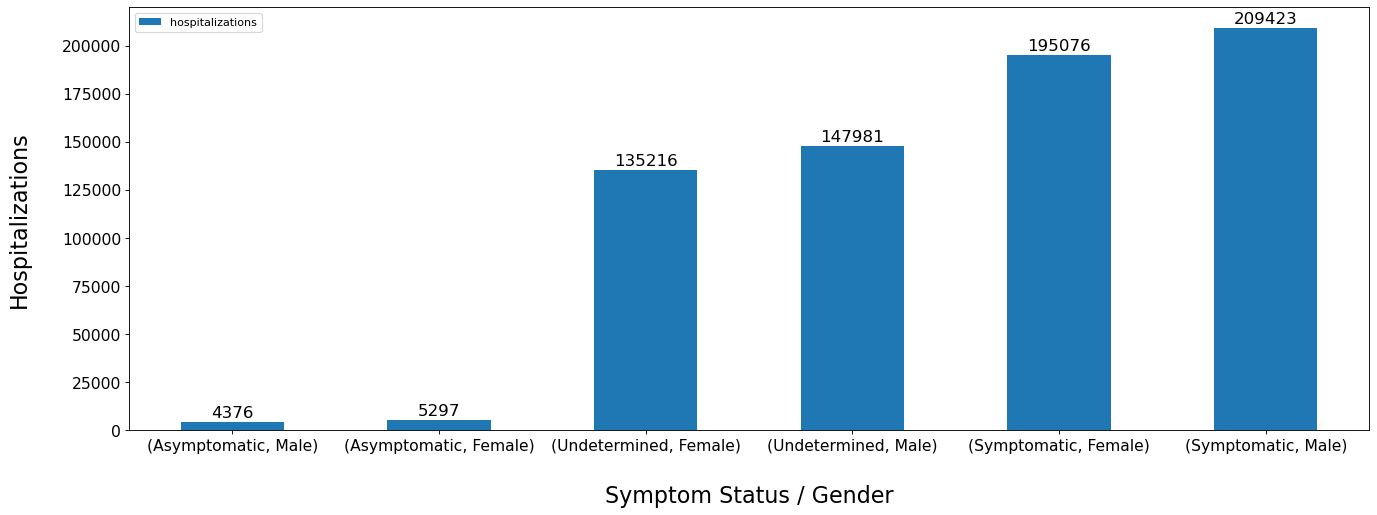

In [387]:
# Create bar chart showing hospitalizations by symptom status and gender
plt.rcParams["figure.dpi"] = 80
plots = hospitalizations_by_symptom_status.plot.bar(figsize = (20,7))

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center',va='center',size=15, xytext=(0, 8),textcoords='offset points')

plt.xticks(rotation='horizontal',fontsize = 14)
plt.yticks(rotation='horizontal',fontsize = 14)
plt.xlabel('\nSymptom Status / Gender', fontsize = 20)
plt.ylabel('Hospitalizations\n', fontsize = 20)